In [1]:
from selenium import webdriver
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import time
import random
from tqdm import tqdm
import gc

In [2]:
#貝萊德世界科技基金A2美元 #直接抓內部API

#讀取最新資料日期
df = pd.read_csv('貝萊德世界科技基金A2美元歷史淨值.csv')
Latest = df.iloc[-1,0]
del df
gc.collect()

option = webdriver.ChromeOptions()
option.add_argument('--headless')
option.add_experimental_option('excludeSwitches', ['enable-automation'])
driver = webdriver.Chrome(options=option)
driver.maximize_window()

count=0
FundHistoryPrice={}

for i in tqdm(range(1,4)): #每頁10個工作天，先觀察自己需要幾頁，或是寫排程每天跑
    url = 'https://fund.api.cnyes.com/fund/api/v1/funds/B09%2C005/nav?format=table&page=' + str(i)
    driver.get(url)
    re = driver.page_source
    Alldata = re.split('[')[1].split(']')[0].split('{')
    del Alldata[0]
    
    for i in range(len(Alldata)):
        count += 1
        data = Alldata[i].split(':')
        Date = str(datetime.date.fromtimestamp(int(data[1].split(',')[0])))
        Price = data[2].split(',')[0]
        Change = 0 if data[3].split(',')[0] == 'null' else data[3].split(',')[0]
        ChangeRate = 0 if data[4].split('}')[0] == 'null' else data[4].split('}')[0]
        
        #如果網頁上的資料比最新資料還要新就抓
        if Date > Latest:
            FundHistoryPrice[count] = [Date, Price, Change, ChangeRate]
        else:
            break
    
    time.sleep(0.1+random.random())

driver.close()

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.04it/s]


In [3]:
#將數據寫入csv
df = pd.DataFrame(FundHistoryPrice).transpose()
df.rename(columns={0:'日期' , 1:'淨值' , 2:'漲跌', 3:'漲跌幅'}, inplace=True)
df = df.sort_values(by=['日期'], ascending=True)

#寫入csv
df.to_csv('貝萊德世界科技基金A2美元歷史淨值.csv', header=0, index=0, mode='a')

In [3]:
##視覺化
#讀取歷史淨值csv
#%matplotlib inline

df = pd.read_csv(r'./\貝萊德世界科技基金A2美元歷史淨值.csv', header=0)

df['日期'] = pd.to_datetime(df['日期'], format='%Y-%m-%d')


<AxesSubplot:title={'center':'貝萊德世界科技基金A2美元歷史淨值'}, xlabel='日期', ylabel='單位淨值'>

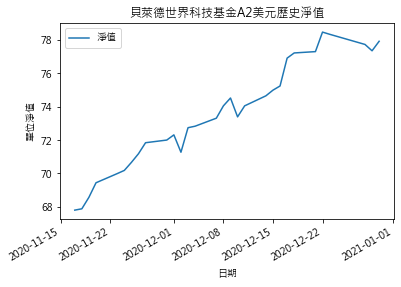

In [5]:
df[-30:].plot(x='日期',
              y='淨值',
              ylabel='單位淨值',
              xlabel='日期',
              title='貝萊德世界科技基金A2美元歷史淨值')
